In [1]:
import gym
import envs
import torch as th
from stable_baselines3 import A2C, PPO, SAC
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env


In [2]:
T_sim = 1e2 # or 10 

In [3]:
env_id='MaintenanceSystem-v1'
env = make_vec_env(env_id, n_envs=2)

## [2,2] system structure

In [4]:
# policy_kwargs = dict(activation_fn=th.nn.ReLU,
#                      net_arch=[dict(pi=[32, 32,32], vf=[32, 32,32])],
#                     ) # [2,2] structure and 10 env steps
# # policy_kwargs=dict(
# #             log_std_init=-2, ortho_init=False),
# model = A2C(policy = "MlpPolicy",
#             env = env,
#             gae_lambda = 0.99,
#             gamma = 0.9,
#             learning_rate = 0.0001,
#             max_grad_norm = 0.5,
#             n_steps = 500,
#             vf_coef = 0.4,
#             ent_coef = 0.0,
#             policy_kwargs=policy_kwargs,
#             normalize_advantage=False,
#             use_rms_prop= True,
#             verbose=1)
# model = PPO("MlpPolicy", env,policy_kwargs=policy_kwargs, verbose=1)

In [5]:
# help(A2C)

In [6]:
# model.learn(200_000, log_interval=1)

In [7]:
# model.save("PPO-MaintenanceEnv-v1")

## A2C algorithm

In [10]:
policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=[dict(pi=[32, 32,64], vf=[64, 32,32])],
                    ) # [1,3,2] structure and 100 env steps
# policy_kwargs=dict(
#             log_std_init=-2, ortho_init=False),
model2 = A2C(policy = "MlpPolicy",
            env = env,
            gae_lambda = 0.99,
            gamma = 0.9,
            learning_rate = 0.0001,
            max_grad_norm = 0.1,
            n_steps = 500,
            vf_coef = 0.4,
            ent_coef = 0.0,
            tensorboard_log = "./tensorboard",
            policy_kwargs=policy_kwargs,
            normalize_advantage=True,
            use_rms_prop= True,
            verbose=1)

Using cuda device


In [11]:
model2.learn(200_000, log_interval=1)
model2.save("a2c-MaintenanceEnv-v1")

2022-11-29 11:25:30.821094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 11:25:31.138072: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-29 11:25:32.026450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hemanthdontamsetti/.local/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda-11.6/lib64
2022-11-29 11:25:32.026521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load d

Logging to ./tensorboard/A2C_2
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -3.04e+03 |
| time/              |           |
|    fps             | 17        |
|    iterations      | 1         |
|    time_elapsed    | 56        |
|    total_timesteps | 1000      |
----------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.03e+03 |
| time/                 |           |
|    fps                | 18        |
|    iterations         | 2         |
|    time_elapsed       | 110       |
|    total_timesteps    | 2000      |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -107      |
|    learning_rate      | 0.0001    |
|    n_updates          | 1         |
|    policy_loss        | 0.386     |
|    value_loss         | 2.44e+17  |
-----------

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.07e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 15        |
|    time_elapsed       | 780       |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -2.49e+03 |
|    learning_rate      | 0.0001    |
|    n_updates          | 14        |
|    policy_loss        | 0.0497    |
|    value_loss         | 3.71e+15  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.07e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 16        |
|    time_elapsed       | 833       |
|    total_timesteps    | 16000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.11e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 28        |
|    time_elapsed       | 1451      |
|    total_timesteps    | 28000     |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -771      |
|    learning_rate      | 0.0001    |
|    n_updates          | 27        |
|    policy_loss        | -0.00586  |
|    value_loss         | 1.63e+15  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.14e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 29        |
|    time_elapsed       | 1493      |
|    total_timesteps    | 29000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.96e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 41        |
|    time_elapsed       | 2142      |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -263      |
|    learning_rate      | 0.0001    |
|    n_updates          | 40        |
|    policy_loss        | 0.201     |
|    value_loss         | 5.71e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.92e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 42        |
|    time_elapsed       | 2193      |
|    total_timesteps    | 42000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.9e+03  |
| time/                 |           |
|    fps                | 18        |
|    iterations         | 54        |
|    time_elapsed       | 2851      |
|    total_timesteps    | 54000     |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -1.83e+03 |
|    learning_rate      | 0.0001    |
|    n_updates          | 53        |
|    policy_loss        | -0.0217   |
|    value_loss         | 3.47e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.97e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 55        |
|    time_elapsed       | 2864      |
|    total_timesteps    | 55000     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 100      |
|    ep_rew_mean        | -3.1e+03 |
| time/                 |          |
|    fps                | 19       |
|    iterations         | 67       |
|    time_elapsed       | 3509     |
|    total_timesteps    | 67000    |
| train/                |          |
|    entropy_loss       | -0.0832  |
|    explained_variance | -250     |
|    learning_rate      | 0.0001   |
|    n_updates          | 66       |
|    policy_loss        | 0.163    |
|    value_loss         | 8.76e+13 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 100      |
|    ep_rew_mean        | -3.1e+03 |
| time/                 |          |
|    fps                | 19       |
|    iterations         | 68       |
|    time_elapsed       | 3549     |
|    total_timesteps    | 68000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.18e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 80        |
|    time_elapsed       | 4106      |
|    total_timesteps    | 80000     |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -390      |
|    learning_rate      | 0.0001    |
|    n_updates          | 79        |
|    policy_loss        | -0.0967   |
|    value_loss         | 1.88e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.24e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 81        |
|    time_elapsed       | 4120      |
|    total_timesteps    | 81000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.19e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 93        |
|    time_elapsed       | 4690      |
|    total_timesteps    | 93000     |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -206      |
|    learning_rate      | 0.0001    |
|    n_updates          | 92        |
|    policy_loss        | 0.188     |
|    value_loss         | 1.24e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.19e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 94        |
|    time_elapsed       | 4768      |
|    total_timesteps    | 94000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.19e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 106       |
|    time_elapsed       | 5361      |
|    total_timesteps    | 106000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -162      |
|    learning_rate      | 0.0001    |
|    n_updates          | 105       |
|    policy_loss        | -0.183    |
|    value_loss         | 7.2e+13   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.22e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 107       |
|    time_elapsed       | 5375      |
|    total_timesteps    | 107000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.02e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 119       |
|    time_elapsed       | 6009      |
|    total_timesteps    | 119000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -122      |
|    learning_rate      | 0.0001    |
|    n_updates          | 118       |
|    policy_loss        | 0.214     |
|    value_loss         | 1.61e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.08e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 120       |
|    time_elapsed       | 6062      |
|    total_timesteps    | 120000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.97e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 132       |
|    time_elapsed       | 6712      |
|    total_timesteps    | 132000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -77.9     |
|    learning_rate      | 0.0001    |
|    n_updates          | 131       |
|    policy_loss        | -0.546    |
|    value_loss         | 5.56e+13  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.97e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 133       |
|    time_elapsed       | 6766      |
|    total_timesteps    | 133000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 100      |
|    ep_rew_mean        | -2.8e+03 |
| time/                 |          |
|    fps                | 19       |
|    iterations         | 145      |
|    time_elapsed       | 7456     |
|    total_timesteps    | 145000   |
| train/                |          |
|    entropy_loss       | -0.0832  |
|    explained_variance | -132     |
|    learning_rate      | 0.0001   |
|    n_updates          | 144      |
|    policy_loss        | 0.138    |
|    value_loss         | 1.14e+14 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.83e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 146       |
|    time_elapsed       | 7522      |
|    total_timesteps    | 146000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.09e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 158       |
|    time_elapsed       | 8142      |
|    total_timesteps    | 158000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -120      |
|    learning_rate      | 0.0001    |
|    n_updates          | 157       |
|    policy_loss        | -0.218    |
|    value_loss         | 5.35e+13  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.12e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 159       |
|    time_elapsed       | 8182      |
|    total_timesteps    | 159000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.96e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 171       |
|    time_elapsed       | 8805      |
|    total_timesteps    | 171000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -75.7     |
|    learning_rate      | 0.0001    |
|    n_updates          | 170       |
|    policy_loss        | 0.495     |
|    value_loss         | 1.32e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -3.02e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 172       |
|    time_elapsed       | 8859      |
|    total_timesteps    | 172000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.93e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 184       |
|    time_elapsed       | 9521      |
|    total_timesteps    | 184000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -81.6     |
|    learning_rate      | 0.0001    |
|    n_updates          | 183       |
|    policy_loss        | -0.478    |
|    value_loss         | 5.19e+13  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.99e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 185       |
|    time_elapsed       | 9562      |
|    total_timesteps    | 185000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.96e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 197       |
|    time_elapsed       | 10211     |
|    total_timesteps    | 197000    |
| train/                |           |
|    entropy_loss       | -0.0832   |
|    explained_variance | -129      |
|    learning_rate      | 0.0001    |
|    n_updates          | 196       |
|    policy_loss        | 0.16      |
|    value_loss         | 1.23e+14  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -2.93e+03 |
| time/                 |           |
|    fps                | 19        |
|    iterations         | 198       |
|    time_elapsed       | 10290     |
|    total_timesteps    | 198000    |
| train/    

rollout/              |           |
|    ep_len_mean        | 100       |
|    ep_rew_mean        | -5.29e+03 |
| time/                 |           |
|    fps                | 1900      |
|    iterations         | 100       |
|    time_elapsed       | 105       |
|    total_timesteps    | 200000    |
| train/                |           |
|    entropy_loss       | -6.86     |
|    explained_variance | -143      |
|    learning_rate      | 0.0001    |
|    n_updates          | 99        |
|    policy_loss        | 2.95      |
|    value_loss         | 7.89e+13  | 
[1,3,2]

[1.5, 1500], [2, 1000], [4, 500]  

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 10        |
|    ep_rew_mean        | -283      |
| time/                 |           |
|    fps                | 2286      |
|    iterations         | 100       |
|    time_elapsed       | 87        |
|    total_timesteps    | 200000    |
| train/                |           |
|    entropy_loss       | -0.571    |
|    explained_variance | -2.51e+03 |
|    learning_rate      | 0.0001    |
|    n_updates          | 99        |
|    policy_loss        | -6.41e+04 |
|    value_loss         | 7.27e+13  |
[2,2]

-------------------------------------

-3.04E3 to -2.87E3 A2C for 200_000 steps, 200 episodes

## PPO algorithm

In [18]:
policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=[dict(pi=[32, 32,64], vf=[64, 32,32])],
                    ) # [1,3,2] structure and 100 env steps
# policy_kwargs=dict(
#             log_std_init=-2, ortho_init=False),
model3 = PPO(policy = "MlpPolicy",
            env = env, 
            learning_rate = 0.0001,
            #n_steps = 500,
            tensorboard_log = "./tensorboard",
            policy_kwargs=policy_kwargs,
            normalize_advantage=True,
            verbose=1)

Using cuda device


In [ ]:
model3.learn(200_000, log_interval=1)
model3.save("PPO-MaintenanceEnv-v1")

Logging to ./tensorboard/PPO_2
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -2.83e+03 |
| time/              |           |
|    fps             | 10        |
|    iterations      | 1         |
|    time_elapsed    | 399       |
|    total_timesteps | 4096      |
----------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 100      |
|    ep_rew_mean          | -2.9e+03 |
| time/                   |          |
|    fps                  | 10       |
|    iterations           | 2        |
|    time_elapsed         | 788      |
|    total_timesteps      | 8192     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0853  |
|    explained_variance   | 0.595    |
|    learning_rate        | 0.0001

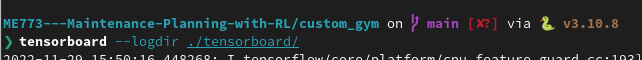

In [ ]:

"""
from stable_baselines3.common.policies import ActorCriticPolicy


class CustomNetwork(nn.Module):
    """
    Custom network for policy and value function.
    It receives as input the features extracted by the feature extractor.

    :param feature_dim: dimension of the features extracted with the features_extractor (e.g. features from a CNN)
    :param last_layer_dim_pi: (int) number of units for the last layer of the policy network
    :param last_layer_dim_vf: (int) number of units for the last layer of the value network
    """

    def __init__(
        self,
        feature_dim: int,
        last_layer_dim_pi: int = 64,
        last_layer_dim_vf: int = 64,
    ):
        super(CustomNetwork, self).__init__()

        # IMPORTANT:
        # Save output dimensions, used to create the distributions
        self.latent_dim_pi = last_layer_dim_pi
        self.latent_dim_vf = last_layer_dim_vf

        # Policy network
        self.policy_net = nn.Sequential(
            nn.Linear(feature_dim, last_layer_dim_pi), nn.ReLU()
        )
        # Value network
        self.value_net = nn.Sequential(
            nn.Linear(feature_dim, last_layer_dim_vf), nn.ReLU()
        )

    def forward(self, features: th.Tensor) -> Tuple[th.Tensor, th.Tensor]:
        """
        :return: (th.Tensor, th.Tensor) latent_policy, latent_value of the specified network.
            If all layers are shared, then ``latent_policy == latent_value``
        """
        return self.policy_net(features), self.value_net(features)

    def forward_actor(self, features: th.Tensor) -> th.Tensor:
        return self.policy_net(features)

    def forward_critic(self, features: th.Tensor) -> th.Tensor:
        return self.value_net(features)


class CustomActorCriticPolicy(ActorCriticPolicy):
    def __init__(
        self,
        observation_space: gym.spaces.Space,
        action_space: gym.spaces.Space,
        lr_schedule: Callable[[float], float],
        net_arch: Optional[List[Union[int, Dict[str, List[int]]]]] = None,
        activation_fn: Type[nn.Module] = nn.Tanh,
        *args,
        **kwargs,
    ):

        super(CustomActorCriticPolicy, self).__init__(
            observation_space,
            action_space,
            lr_schedule,
            net_arch,
            activation_fn,
            # Pass remaining arguments to base class
            *args,
            **kwargs,
        )
        # Disable orthogonal initialization
        self.ortho_init = False

    def _build_mlp_extractor(self) -> None:
        self.mlp_extractor = CustomNetwork(self.features_dim)


model = PPO(CustomActorCriticPolicy, "CartPole-v1", verbose=1)
model.learn(5000)
"""